In [2]:
import random
import matplotlib.pyplot as plt
import time
import numpy as np

In [3]:
# Generate a list of numbers that is suitably large and sort it
def generate_list(size):
    a = []
    for i in range(size):
        a.append(random.randint(0, size*10))
        a.sort()
    return a

In [70]:
print(generate_list(10))

[1, 8, 19, 39, 60, 61, 66, 73, 77, 100]


Imagine a list: [1, 2, 3, 4, 5, 6] and you're looking for 3.

First, you look at 1 which is not the value. then you look at 2. Incorrect. Then you look at 3. Found it!

In Linear search you check items one after another in a line. You might find what you want right away, or you might have to check everything in the list. its the simplest way to search, but not always the fastest, especially with large lists. 

The runtime will be the most efficient when the number that your looking for is first in the list. The worst case runtime will be when the number is at the end of the list.

In [4]:
def linear_search(a, target):
    for i in range(len(a)):
        if a[i] == target:
            return i
    return "none"

In [85]:
g = generate_list(10)
print(g)
print(linear_search(g, g[5]))

[23, 24, 27, 48, 68, 77, 85, 86, 90, 93]
5


1. Generate a large list search 3 times for the first element record the median time 

2. Search 3 times for the middle element record the median time

3. Search 3 times for the last element and record the median time


Done this for different list sizes and ploted the time vs the size of the list

In [14]:
array_size = [1000, 2000, 4000, 8000, 16000, 32000, 48000, 64000, 80000, 96000]
medians = []

for size in array_size:
    l = generate_list(size)  
    median_list = []  

    for target in range(3):
        if target == 0:
            target_index = 0  
        elif target == 1:
            target_index = size // 2  
        else:
            target_index = size - 1  

        times = []  
        for i in range(3): 
            start = time.perf_counter()
            linear_search(l, l[target_index])  
            end = time.perf_counter()
            times.append(end - start)

        times.sort()  
        median_time = np.median(times)  
        median_list.append(median_time)  

    medians.append(median_list) 
    print("done ", size)

#print(medians)


done  1000
done  2000
done  4000
done  8000
done  16000
done  32000
done  48000
done  64000
done  80000
done  96000


This code groups the timing data from  linear search properly. I first create a new list called medians2 with three empty lists to store the reorganized times. The code takes each element and place it in the new lists - all first position timings go into the first list, middle position timings into the second list, and last position timings into the third list. This reorganization makes it easier to compare how search time varies based on the position of the target element across different list sizes.

In [15]:
medians2 = []
for i in range(3):
    medians2.append([])

for mlist in medians:
    for index, elem in enumerate(mlist):
        medians2[index].append(elem)

#for l in medians2:
 #   print(l)

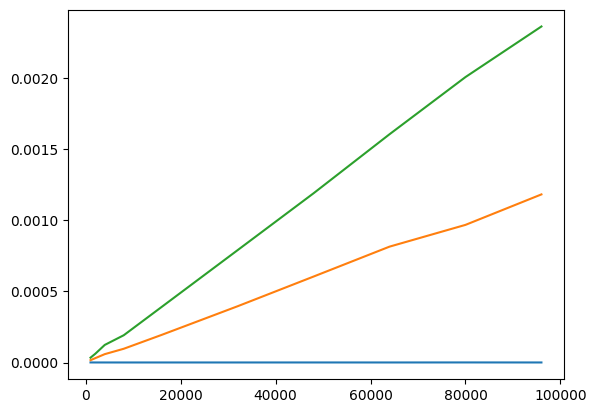

In [16]:
for l in medians2:
    plt.plot(array_size, l)

When the element is first in the list, it takes the least amount of time and is the best case scenario. This is the blue line in the graph above.

The worst case is when the element is last. This takes the most amount of time. This is the green curve in the graph above.

The average case will be when the elment is in the middle. This is the orange curve in the graph above.